## Gradient Boosting Ensemble

The Gradient Boosting Machine is a powerful ensemble machine learning algorithm that uses decision trees. Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models. AdaBoost was the first algorithm to deliver on the promise of boosting.

Gradient boosting is a generalization of AdaBoosting, improving the performance of the approach and introducing ideas from bootstrap aggregation to further improve the models, such as randomly sampling the samples and features when fitting ensemble members.

In this code, we will develop Gradient Boosting ensembles for classification and regression.

### Part 1: Gradient Boosting for Classification

First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features.
We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [2]:
# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [3]:
# define the model
model = GradientBoostingClassifier()

In [4]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.899 (0.031)


In [5]:
# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]
yhat = model.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


### Part 2: Gradient Boosting for Regression

First, we can use the make_regression() function to create a synthetic regression problem with 1,000 examples and 20 input features. As we did with the last section, we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds. We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [6]:
# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [7]:
# define the model
model = GradientBoostingRegressor()

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.490 (3.265)


In [8]:
# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492, 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819, -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
yhat = model.predict([row])

# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 37


### Part 3 : Gradient Boosting Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the Gradient Boosting ensemble and their effect on model performance.

There are perhaps four key hyperparameters that have the biggest effect on model performance, they are :
- the number of models in the ensemble (*n_estimators*), 
- the variance of the model controlled via the size of the data sample (*subsample*) used to train each model or features used in tree splits (*max_features*)
- the learning rate (*learning_rate*), 
- the depth of the decision tree (*max_depth*)

#### 3.1 Number of Trees (*n_estimators*)

An important hyperparameter for the Gradient Boosting ensemble algorithm is the number of decision trees used in the ensemble.

Recall that decision trees are added to the model sequentially in an effort to correct and improve upon the predictions made by prior trees. As such, more trees is often better. The number of trees must also be balanced with the learning rate, e.g. more trees may require a smaller learning rate, fewer trees may require a larger learning rate. The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 5,000.

In [10]:
# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

In [11]:
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y


# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models


# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [17]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)

	# store the results
	results.append(scores)
	names.append(name)

	# summarize the performance along the way
	print(f"Num of Estimators={name} : Mean Score = {mean(scores):.3f} ; Std Dev of Scores = {std(scores):.3f}")


Num of Estimators=10 : Mean Score = 0.830 ; Std Dev of Scores = 0.037
Num of Estimators=50 : Mean Score = 0.880 ; Std Dev of Scores = 0.034
Num of Estimators=100 : Mean Score = 0.899 ; Std Dev of Scores = 0.029
Num of Estimators=500 : Mean Score = 0.919 ; Std Dev of Scores = 0.025
Num of Estimators=1000 : Mean Score = 0.919 ; Std Dev of Scores = 0.029
Num of Estimators=5000 : Mean Score = 0.922 ; Std Dev of Scores = 0.026


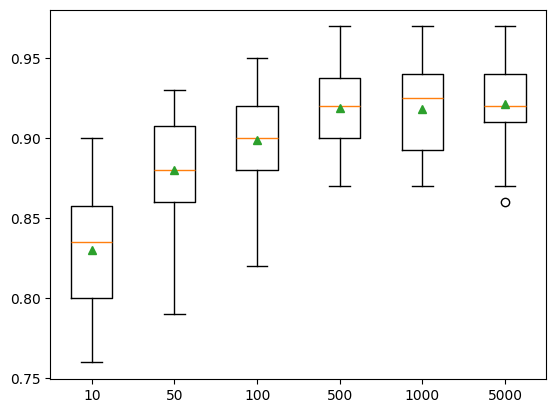

In [18]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that that performance improves on this dataset until about 500 trees, after which performance appears to level off. Unlike AdaBoost, Gradient Boosting appears to not overfit as the number of trees is increased in this case.

#### 3.2.1 Number of Samples (*subsample*)

The number of samples used to fit each tree can be varied. This means that each tree is fit on a randomly selected subset of the training dataset.

Using fewer samples introduces more variance for each tree, although it can improve the overall performance of the model.

The number of samples used to fit each tree is specified by the “subsample” argument and can be set to a fraction of the training dataset size. By default, it is set to 1.0 to use the entire training dataset.

In [19]:
# explore gradient boosting ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot


In [20]:

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


In [22]:

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print(f"Subsample={name} : Mean Score = {mean(scores):.3f} ; Std Dev of Scores = {std(scores):.3f}")


Subsample=0.1 : Mean Score = 0.871 ; Std Dev of Scores = 0.039
Subsample=0.2 : Mean Score = 0.893 ; Std Dev of Scores = 0.030
Subsample=0.3 : Mean Score = 0.894 ; Std Dev of Scores = 0.025
Subsample=0.4 : Mean Score = 0.906 ; Std Dev of Scores = 0.032
Subsample=0.5 : Mean Score = 0.903 ; Std Dev of Scores = 0.028
Subsample=0.6 : Mean Score = 0.904 ; Std Dev of Scores = 0.032
Subsample=0.7 : Mean Score = 0.905 ; Std Dev of Scores = 0.029
Subsample=0.8 : Mean Score = 0.899 ; Std Dev of Scores = 0.032
Subsample=0.9 : Mean Score = 0.901 ; Std Dev of Scores = 0.036
Subsample=1.0 : Mean Score = 0.899 ; Std Dev of Scores = 0.030


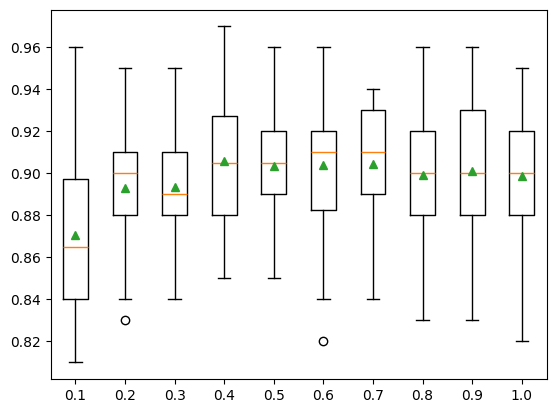

In [23]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that mean performance is probably best for a sample size that is about half the size of the training dataset, such as 0.4 or higher. We can see the general trend of increasing model performance perhaps peaking around 0.4 and staying somewhat level.

#### 3.2.2 Number of Features (*max_features*)

The number of features used to fit each decision tree can be varied.

Like changing the number of samples, changing the number of features introduces additional variance into the model, which may improve performance, although it might require an increase in the number of trees. The number of features used by each tree is taken as a random sample and is specified by the “max_features” argument and defaults to all features in the training dataset.

The example below explores the effect of the number of features on model performance for the test dataset between 1 and 20.

In [24]:
# explore gradient boosting number of features on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot


In [25]:

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1,21):
		models[str(i)] = GradientBoostingClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


In [26]:

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print(f"Num Features={name} : Mean Score = {mean(scores):.3f} ; Std Dev of Scores = {std(scores):.3f}")


Num Features=1 : Mean Score = 0.877 ; Std Dev of Scores = 0.036
Num Features=2 : Mean Score = 0.886 ; Std Dev of Scores = 0.035
Num Features=3 : Mean Score = 0.889 ; Std Dev of Scores = 0.033
Num Features=4 : Mean Score = 0.898 ; Std Dev of Scores = 0.030
Num Features=5 : Mean Score = 0.896 ; Std Dev of Scores = 0.031
Num Features=6 : Mean Score = 0.894 ; Std Dev of Scores = 0.034
Num Features=7 : Mean Score = 0.898 ; Std Dev of Scores = 0.032
Num Features=8 : Mean Score = 0.896 ; Std Dev of Scores = 0.030
Num Features=9 : Mean Score = 0.902 ; Std Dev of Scores = 0.033
Num Features=10 : Mean Score = 0.903 ; Std Dev of Scores = 0.029
Num Features=11 : Mean Score = 0.902 ; Std Dev of Scores = 0.034
Num Features=12 : Mean Score = 0.899 ; Std Dev of Scores = 0.028
Num Features=13 : Mean Score = 0.897 ; Std Dev of Scores = 0.035
Num Features=14 : Mean Score = 0.904 ; Std Dev of Scores = 0.029
Num Features=15 : Mean Score = 0.898 ; Std Dev of Scores = 0.034
Num Features=16 : Mean Score = 0.8

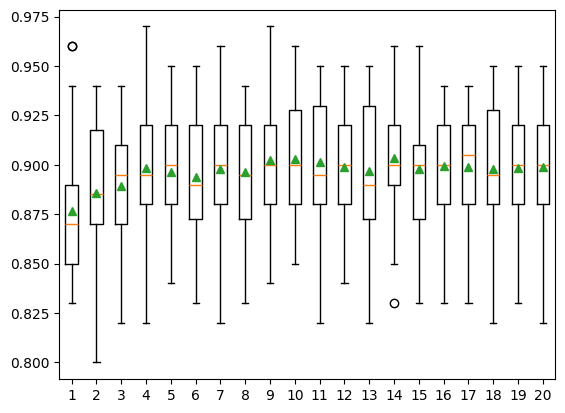

In [27]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that mean performance increases to about half the number of features and stays somewhat level after that. It’s surprising that removing half of the input variables has so little effect. We can see the general trend of increasing model performance perhaps peaking around eight or nine features and staying somewhat level.

#### 3.3 Learning Rate (*learning_rate*)

Learning rate controls the amount of contribution that each model has on the ensemble prediction.Smaller rates may require more decision trees in the ensemble, whereas larger rates may require an ensemble with fewer trees. It is common to explore learning rate values on a log scale, such as between a very small value like 0.0001 and 1.0.

The learning rate can be controlled via the “learning_rate” argument and defaults to 0.1.

The example below explores the learning rate and compares the effect of values between 0.0001 and 1.0.

In [29]:
# explore gradient boosting ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot


In [30]:

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define learning rates to explore
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


In [31]:

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print(f"Learning Rate={name} : Mean Score = {mean(scores):.3f} ; Std Dev of Scores = {std(scores):.3f}")


Learning Rate=0.0001 : Mean Score = 0.761 ; Std Dev of Scores = 0.043
Learning Rate=0.0010 : Mean Score = 0.781 ; Std Dev of Scores = 0.034
Learning Rate=0.0100 : Mean Score = 0.836 ; Std Dev of Scores = 0.034
Learning Rate=0.1000 : Mean Score = 0.899 ; Std Dev of Scores = 0.030
Learning Rate=1.0000 : Mean Score = 0.906 ; Std Dev of Scores = 0.031


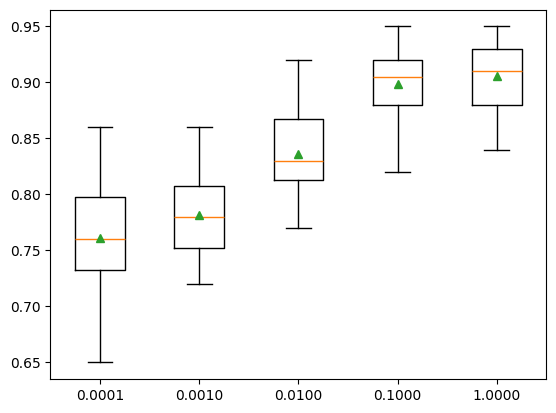

In [32]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that a larger learning rate results in better performance on this dataset. We would expect that adding more trees to the ensemble for the smaller learning rates would further lift performance.

This highlights the trade-off between the number of trees (speed of training) and learning rate, e.g. we can fit a model faster by using fewer trees and a larger learning rate.

#### 3.4 Tree Depth (*max_depth*)

Like varying the number of samples and features used to fit each decision tree, varying the depth of each tree is another important hyperparameter for gradient boosting.

The tree depth controls how specialized each tree is to the training dataset: how general or overfit it might be. Trees are preferred that are not too shallow and general (like AdaBoost) and not too deep and specialized (like bootstrap aggregation).

Gradient boosting performs well with trees that have a modest depth finding a balance between skill and generality.

Tree depth is controlled via the “max_depth” argument and defaults to 3.

The example below explores tree depths between 1 and 10 and the effect on model performance.

In [33]:
# explore gradient boosting tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

In [34]:

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define max tree depths to explore between 1 and 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


In [35]:

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print(f"Tree Depth={name} : Mean Score = {mean(scores):.3f} ; Std Dev of Scores = {std(scores):.3f}")


Tree Depth=1 : Mean Score = 0.834 ; Std Dev of Scores = 0.031
Tree Depth=2 : Mean Score = 0.877 ; Std Dev of Scores = 0.029
Tree Depth=3 : Mean Score = 0.898 ; Std Dev of Scores = 0.030
Tree Depth=4 : Mean Score = 0.905 ; Std Dev of Scores = 0.031
Tree Depth=5 : Mean Score = 0.913 ; Std Dev of Scores = 0.029
Tree Depth=6 : Mean Score = 0.911 ; Std Dev of Scores = 0.032
Tree Depth=7 : Mean Score = 0.904 ; Std Dev of Scores = 0.032
Tree Depth=8 : Mean Score = 0.891 ; Std Dev of Scores = 0.032
Tree Depth=9 : Mean Score = 0.845 ; Std Dev of Scores = 0.032
Tree Depth=10 : Mean Score = 0.829 ; Std Dev of Scores = 0.033


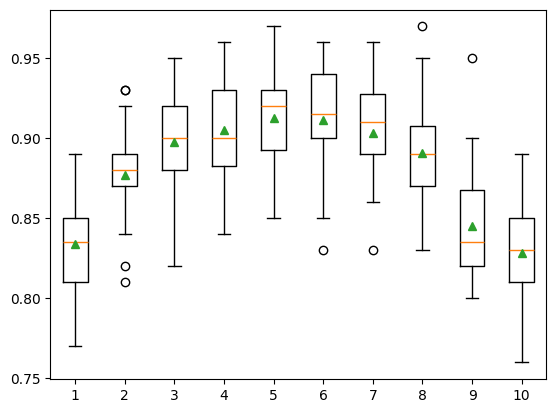

In [36]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see the general trend of increasing model performance with the tree depth to a point, after which performance begins to degrade rapidly with the over-specialized trees.

### Part 4: Grid Search Hyperparameters

Gradient boosting can be challenging to configure as the algorithm as many key hyperparameters that influence the behavior of the model on training data and the hyperparameters interact with each other.

As such, it is a good practice to use a search process to discover a configuration of the model hyperparameters that works well or best for a given predictive modeling problem. Popular search processes include a random search and a grid search. In this section we will look at grid searching common ranges for the key hyperparameters for the gradient boosting algorithm. This can be achieving using the GridSearchCV class and specifying a dictionary that maps model hyperparameter names to the values to search.

In this case, we will grid search four key hyperparameters for gradient boosting: the number of trees used in the ensemble, the learning rate, subsample size used to train each tree, and the maximum depth of each tree.

Each configuration combination will be evaluated using repeated k-fold cross-validation and configurations will be compared using the mean score, in this case, classification accuracy.

In [37]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search

In [39]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)


In [40]:
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.945000 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.5}
0.529667 (0.090129) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.525000 (0.076627) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.524000 (0.072874) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.770333 (0.033812) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.772333 (0.036577) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.738667 (0.049982) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.824333 (0.034417) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.813333 (0.038759) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.761000 (0.043077) with: {'learning_rate': 0.0001,